##Market Basket Analysis in Python
An Implementation of Machine Learning In Retail Business

One of them is retail business. Imagine if you are a retail business owner who owns a retail shop that sells hundreds of items. In a single month, there are more than a hundred transactions occurring in your shop, for instance. Each transaction is usually made with more than an item to be bought. It means there are usually more than an item in a single transaction.

In the end of the month, you would like to increase the sales in your shop, so you are trying to figure out which ways is the best to create promotions or to apply discounts on particular items.

- Which products should be discounted?
- How do we apply the discounts? 
- Are there any patterns that occur to our sales, so that we could apply the promotion more accurately?

###Market Basket Analysis
- One of a well-known techniques in data science and machine learning
-Market Basket Analysis (MBA) is an accidental transaction pattern that purchasing some products will affect the purchasing of other products. 
-MBA is used to predict what products that customer interested in
-The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers
- We will find a patterns that shows which items are frequently purchased together so that we could apply a discounts into a particular items more accurately.


##1. Import Dataset

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Final_Market _Analytics/Market basket Analysis/dataset_group (1).csv')

In [6]:
data

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


This datasets contains 3 features with 20641 rows.

2. Drop all Null Values

In [7]:
data.dropna()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


To perform any machine learning model, we should handle the NaN or Null values in our datasets

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [11]:
#Taking a look at the data shape and sorting by date
print(data.shape)
data.sort_index(inplace=True)
data.head()

(20641, 3)


,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


#Number of unique Costumers and Items

In [12]:
print(data.Order_id.nunique())
print(data.Product.nunique())

1139
37


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [15]:
data.duplicated().sum()

4730

In [17]:
data['Product'] = data['Product'].str.lower()
data

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


#Convert the 'Date' column to datetime format

In [18]:
data['Date']= pd.to_datetime(data['Date'])

#Extracting year,month and day

In [19]:

data['year'] = data['Date'].apply(lambda x : x.year)
data['month'] = data['Date'].apply(lambda x : x.month)
data['day'] = data['Date'].apply(lambda x : x.day)
data['weekday'] = data['Date'].apply(lambda x : x.weekday())

#Rearranging the columns

In [20]:
data=data[['Order_id', 'Date','year', 'month', 'day','weekday','Product']]
data.head()

,Order_id,Date,year,month,day,weekday,Product
0,1,2018-01-01,2018,1,1,0,yogurt
1,1,2018-01-01,2018,1,1,0,pork
2,1,2018-01-01,2018,1,1,0,sandwich bags
3,1,2018-01-01,2018,1,1,0,lunch meat
4,1,2018-01-01,2018,1,1,0,all- purpose


In [21]:
data['month'].value_counts()

1     2732
2     2210
5     2131
7     2115
6     2054
3     1966
8     1963
4     1861
9     1786
11     760
12     649
10     414
Name: month, dtype: int64

In [22]:
data['year'].value_counts()

2018    9479
2019    9333
2020    1829
Name: year, dtype: int64

In [23]:
data['weekday'].value_counts()

6    3147
1    3115
4    3048
2    2888
3    2840
5    2839
0    2764
Name: weekday, dtype: int64

In [24]:
data['day'].value_counts()

1     1293
2     1216
3     1030
9     1028
17     910
5      892
8      793
22     793
21     792
4      761
19     761
30     739
7      715
25     690
23     680
26     676
13     652
6      637
16     635
29     630
27     628
14     624
18     591
20     583
15     576
24     490
31     463
28     363
Name: day, dtype: int64

In [26]:
df = data.drop(data[data.Product == 'none'].index)
df

,Order_id,Date,year,month,day,weekday,Product
0,1,2018-01-01,2018,1,1,0,yogurt
1,1,2018-01-01,2018,1,1,0,pork
2,1,2018-01-01,2018,1,1,0,sandwich bags
3,1,2018-01-01,2018,1,1,0,lunch meat
4,1,2018-01-01,2018,1,1,0,all- purpose
...,...,...,...,...,...,...,...
20636,1138,2020-02-25,2020,2,25,1,soda
20637,1138,2020-02-25,2020,2,25,1,paper towels
20638,1139,2020-02-26,2020,2,26,2,soda
20639,1139,2020-02-26,2020,2,26,2,laundry detergent


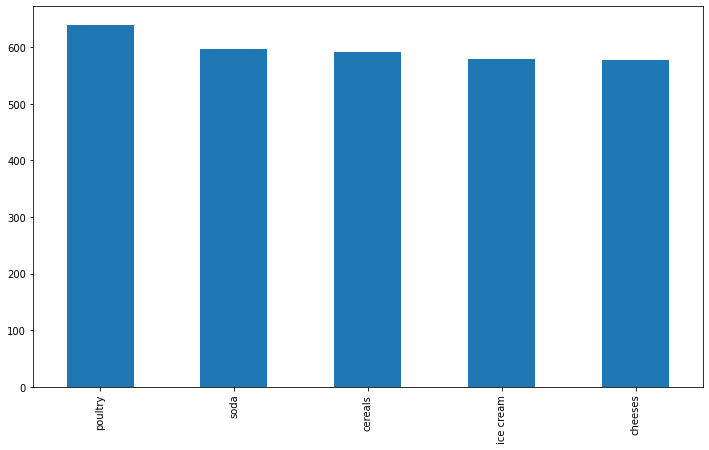

In [27]:
df['Product'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,7));

In [29]:
from wordcloud import WordCloud 

(-0.5, 511.5, 383.5, -0.5)

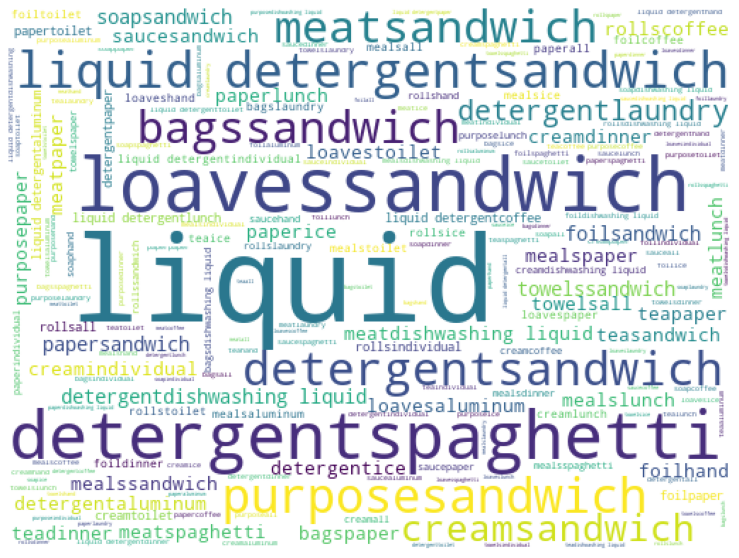

In [30]:
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(df['Product']))

plt.imshow(wordcloud)
plt.axis('off')

#Chart 1 - Most frequently purchased items

Text(0, 0.5, 'Quantity')

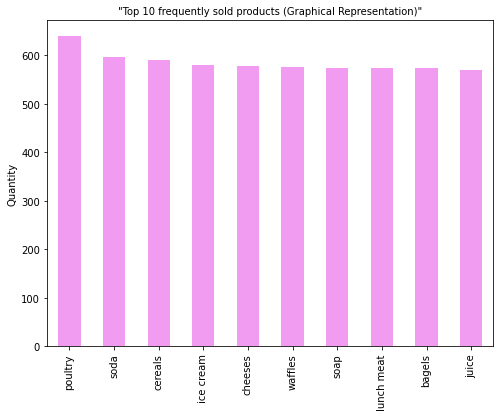

In [31]:

df['Product'].value_counts().head(10).plot.bar(figsize=(8, 6), alpha=0.8, color='violet')
plt.title('"Top 10 frequently sold products (Graphical Representation)"', size=10)
plt.ylabel('Quantity')

#Chart 2 - Least purchased items

In [ ]:

df['Product'].value_counts().tail(10).plot.bar(figsize=(8, 6), alpha=0.8, color='lightseagreen')
plt.title('Least 10 sold products (Graphical Representation)', size=15)
plt.ylabel('Quantity')

#Chart 3- Top Costumers who bought most purchase items 

Text(0, 0.5, 'Quantity Purchased')

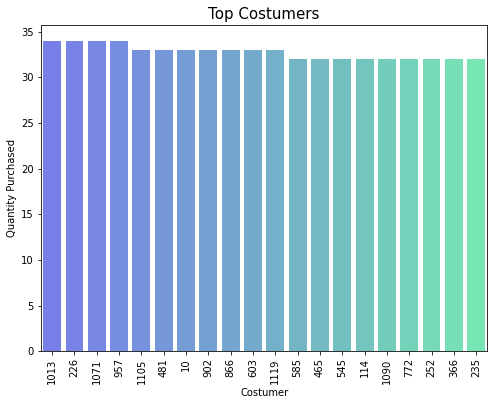

In [32]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Order_id', palette='winter', data=df, alpha=0.6, order=df.Order_id.value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Top Costumers', size=15)
plt.xlabel('Costumer')
plt.ylabel('Quantity Purchased')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


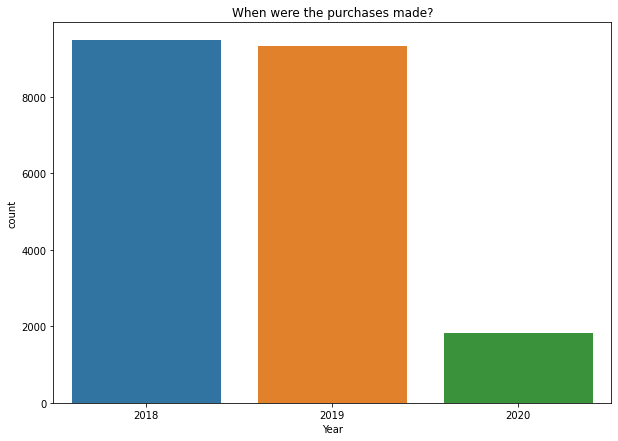

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10,7))
sns.countplot(df['Date'].apply(lambda x: x.year))
plt.title('When were the purchases made?')
plt.xlabel('Year')
plt.show()

The dataset contains the purchases made only in 2018,2019 and 2020.The sales was highest in 2018 and 2019 while least in 2020

Create the Basket Data-Grouping data by order id and Product to create baskets and  showed the values ​​of Quantity of each item bought

Lastly I changed the index of the data frame to the Order_id so that we could see the quantity of each product bought per Order_Id

In [35]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')
basket

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,eggs,flour,fruits,hand soap,ice cream,individual meals,juice,ketchup,laundry detergent,lunch meat,milk,mixes,paper towels,pasta,pork,poultry,sandwich bags,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1136,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1137,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


This basket data will contain the Quantity of each items bought per transaction order_id

This dataframe is basically the ‘basket’ that our customers ‘carry on’ to the cashier in our shop.

It shows us how much this customer bought a particular item.
If the number is 0, then this customer didn’t buy that particular item. If it shows another value (2 for instances), it means that the customer has bought as many as 2 items.

Encode The Data

In market basket analysis, the number of each item bought is not really important. The important one is whether an item is bought or not. Because, we only would like to know, what is the association of buying some items and buying some others
So, we need to encode the basket data into a binary data that shows whether an items is bought (1) or not (0).

In [36]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [39]:
basket_encoded=basket.applymap(encode_zero_one)
basket_encoded

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,eggs,flour,fruits,hand soap,ice cream,individual meals,juice,ketchup,laundry detergent,lunch meat,milk,mixes,paper towels,pasta,pork,poultry,sandwich bags,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0
1136,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1137,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1


- Here, I created a function called encode_zero_one that have one particular job; encode the units.
- If the units is equal to or less than 0, the function will change it into 0 (Not bought). 
- If the units is more than or equal to 1, it will change the units into 1 (bought). 
- This way, we generated a data frame that shows us whether a particular items is bought or not.

 Filter The Transaction : Bought More Than 1 Items Only
 - In market basket analysis, we are going to uncover the association between 2 or more items that is bought according to historical data. 
 - So, it is less useful if a transaction only bought a single items
 - The next step is to filter out the transactions that is bought more than 1 item

In [43]:
basket_filter=basket_encoded[(basket_encoded>0).sum(axis=1)>=2]
basket_filter

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,eggs,flour,fruits,hand soap,ice cream,individual meals,juice,ketchup,laundry detergent,lunch meat,milk,mixes,paper towels,pasta,pork,poultry,sandwich bags,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0
1136,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1137,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1


According to the result above, we could see that there are 1139 transaction that bought more than 1 items.

It means, 92.35 % of the basket data is a transaction that is bought more than 1 item.

Apply the Apriori Algorithm

After generating the dataset above, it is now the time for us to use the apriori algorithm.

Apriori algorithm is simply used to find the frequently bought items in the dataset

In applying the apriori algorithm, first you have to install the library called “mlxtend”

In [44]:
from mlxtend.frequent_patterns import apriori

In [47]:
frequent_itemsets=apriori(basket_filter,min_support=0.05,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.421422,(poultry),1
1,0.398595,(ice cream),1
2,0.395961,(cereals),1
3,0.395083,(lunch meat),1
4,0.394205,(waffles),1
...,...,...,...
8449,0.050044,"(sandwich loaves, sugar, pork)",3
8450,0.050044,"(tortillas, juice, fruits)",3
8451,0.050044,"(individual meals, sandwich bags, hand soap)",3
8452,0.050044,"(juice, flour, fruits)",3


- In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value
- In this case, I define a frequently bought items as an items that is bought as many as 5% out of the whole transaction, it means I will give the support value of 0.05
-After that,added another column called length that contain the number of item that is bought.

We see that there are 8453 transaction that is consider as a frequently bought items

It is shown in the picture that Poultry  is the most frequently bought items with the support value of 0.4214
It means the item is bought 1866 times out of the whole transaction.

##Finding The Association Between Frequently Bought Items

- After applying the apriori algorithm and finding the frequently bought item, it is now the time for us to apply the association rules
-  From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together.
- The objective of the project

In [48]:
from mlxtend.frequent_patterns import association_rules

In [52]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
1,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
2,"(ice cream, pasta)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
3,"(eggs, paper towels)","(ice cream, pasta)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
4,"(dinner rolls, paper towels)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
...,...,...,...,...,...,...,...,...,...
46155,"(dishwashing liquid/detergent, juice)",(coffee/tea),0.152766,0.379280,0.057946,0.379310,1.000080,0.000005,1.000049
46156,(coffee/tea),"(dishwashing liquid/detergent, juice)",0.379280,0.152766,0.057946,0.152778,1.000080,0.000005,1.000014
46157,"(bagels, laundry detergent)",(coffee/tea),0.152766,0.379280,0.057946,0.379310,1.000080,0.000005,1.000049
46158,(flour),"(poultry, ice cream)",0.352941,0.179104,0.063213,0.179104,1.000000,0.000000,1.000000


- From the association_rules results above, we could see that eggs ,ice-cream and pasta and paper towels  are the items that has the highest association each other since these two items has the highest “lift” value.
- The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other.
-In thise case, the highest value is 2.01 which is highest. It means these 2 items are very good to be sold together.


Beside that, we could also see the support value of  eggs ,ice-cream and pasta and paper towels  are 0.0309% which means there are 5 % out of total transaction that these 2 items were sold together.
 In number, it is 476 times.

From the confidence, we could even extract more information. Remember that the confidence value is influenced by the antecedent and consequent.

- If the antecedent(support lower it is higher ) is higher than the consequent(support), then the rule that will be applied is rule number 1 (not number 2). vice versa. 
- In this case, the antecedent value is higher than the consequent value. It means we will apply rule number 1 which is pasta, paper towels → eggs and icecreams. 
- In a more detail explanation, it means that a customer will tends to bought eggs and ice-creams AFTER they bought pasta and paper towel .
- Not in the other way around. 
- This could be a very valuable information, because we are now aware which products should we put the discounts on.
-  We could give a discounts on eggs and ice-creams if a customer buy pasta and paper towels.

 Business Insights :
- 1.Item Placements. We could put eggs and ice-creams and pasta and paper towel in a closer place, maybe in a same shelf or any other closer place.
- 2.Products Bundling. We could put eggs and ice-creams and pasta and paper towels as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.
- 3.Customer Recommendation and Discounts. We could put eggs and ice-creams in the cashier, so that every time a customer bought pasta and paper towel, we could offer and recommend them to buy eggs and ice-creams with a lower price.


# Let's see the rules with the highest lift

In [53]:
result_df = rules.sort_values(by='lift', ascending=False)
result_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
1,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
2,"(ice cream, pasta)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
3,"(eggs, paper towels)","(ice cream, pasta)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
4,"(dinner rolls, paper towels)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830


In [56]:
rules.sort_values(by='lift',ascending=False).head(10).iloc[:,:-2][['antecedents',
                                                                  'consequents',
                                                                   'consequent support',
                                                                  'lift']]

,antecedents,consequents,consequent support,lift
0,"(pasta, paper towels)","(eggs, ice cream)",0.166813,2.019617
1,"(eggs, ice cream)","(pasta, paper towels)",0.164179,2.019617
2,"(ice cream, pasta)","(eggs, paper towels)",0.165935,1.987784
3,"(eggs, paper towels)","(ice cream, pasta)",0.167691,1.987784
4,"(dinner rolls, paper towels)","(eggs, pasta)",0.169447,1.967185
5,"(eggs, pasta)","(dinner rolls, paper towels)",0.155399,1.967185
6,"(poultry, spaghetti sauce)","(juice, dinner rolls)",0.157155,1.925254
7,"(juice, dinner rolls)","(poultry, spaghetti sauce)",0.171203,1.925254
8,"(cereals, sandwich bags)","(cheeses, bagels)",0.167691,1.921524
9,"(cheeses, bagels)","(cereals, sandwich bags)",0.158033,1.921524


##Similarly, we will check the the rules with the lower lift (i.e., rules where the items in antecedent and consequent are unlikely to be bought together).

In [55]:
rules.sort_values(by='lift',ascending=True).head(10).iloc[:,:-2][['antecedents',
                                                                  'consequents',
                                                                   'consequent support',
                                                                  'lift']]

,antecedents,consequents,consequent support,lift
46159,"(poultry, ice cream)",(flour),0.352941,1.000000
46158,(flour),"(poultry, ice cream)",0.179104,1.000000
46156,(coffee/tea),"(dishwashing liquid/detergent, juice)",0.152766,1.000080
46154,(coffee/tea),"(bagels, laundry detergent)",0.152766,1.000080
46157,"(bagels, laundry detergent)",(coffee/tea),0.379280,1.000080
46155,"(dishwashing liquid/detergent, juice)",(coffee/tea),0.379280,1.000080
46153,"(eggs, toilet paper)",(sandwich loaves),0.349429,1.000095
46152,(sandwich loaves),"(eggs, toilet paper)",0.163301,1.000095
46151,"(butter, lunch meat)",(yogurt),0.384548,1.000176
46150,(yogurt),"(butter, lunch meat)",0.159789,1.000176


# Let's visualize the relation between support, confidence and lift

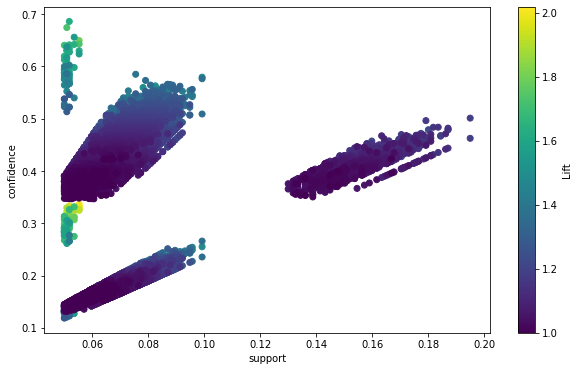

In [57]:
sup = rules['support'].values
conf = rules['confidence'].values
lift = rules['lift'].values

plt.figure(figsize=(10,6))
sc = plt.scatter(sup,conf,c=lift)
plt.colorbar(sc,label='Lift')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

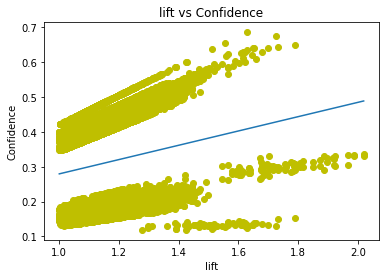

In [58]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

# As we see, most rules have both high confidence and high support. 
# However, there is one rule that we may want to stand  out: the rule with the confidence of about  68% :

Top 2 Rules with confidence >66%

In [59]:
rules1=rules[rules['confidence'] > 0.66]
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,"(bagels, cereals, sandwich bags)",(cheeses),0.075505,0.390694,0.050922,0.674419,1.726209,0.021423,1.871441
91,"(ice cream, dinner rolls, spaghetti sauce)",(poultry),0.075505,0.421422,0.051800,0.686047,1.627931,0.019980,1.842877


- We see that the probability of a customer buying (poultry) is roughly  lift(16%) . -But given that the customer has bougth ( Ice-creams ,dinner rolls, spaghetti sauce, the probability of buying poultry  increases to confidence( 68% ).
-This also signifies that the rule has a high lift of 1.62%.But again support is very low only(0.05%).
-So rule seems to be promosing as support is low.Here we should nt make any rash conclusion about the association between two itemsets without further investigation.
- To investigate one option is to do survey by asking directly or indirectly to customer who purcshased items by questioning them why they buy these items together.


Recommendations;

Combo Offers 
- 1.Poultry with Eggs (Buy2 poultry get a carton of eggs free)
- 2.As per rule 2,chees with sandwitch bags and Bagels ,cereals be combined at a competitive price .
- 3.Combo Offer of Poultry and Beef ,Spagattti sauce with dinner rolls  and poultry 
- 4.Lunch combo of Lnch Meat and Waffles with juice.

Discounts offers

- 1.10 % off if you buy Poultry with One Eggs carton (assuming one carton contains dozen of eggs )
- 2.5 % off on cheese with Bagels 
- 3.15 % off on Poultry & Beef if brought together 
- 4.5% off on Milk and Ice-creamif brought together 